# Lesson 3 - Classify

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np

In [3]:
df = pd.read_csv("../data/enem.csv")

In [4]:
len(df)

2000

In [6]:
df.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

# Proporção de treineiros

In [7]:
df["IN_TREINEIRO"].value_counts(normalize = True)

0    0.889
1    0.111
Name: IN_TREINEIRO, dtype: float64

<AxesSubplot:>

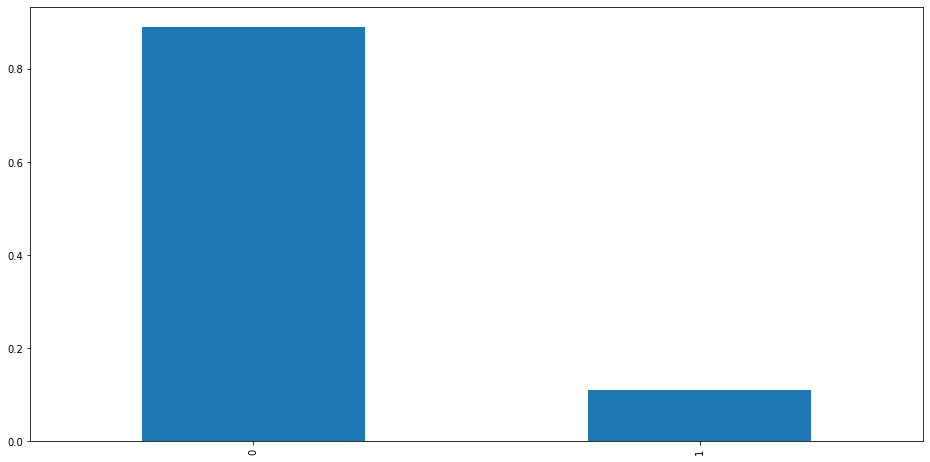

In [8]:
df["IN_TREINEIRO"].value_counts(normalize = True).plot.bar(figsize=(16,8))

In [9]:
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190005695347,2019,2304400,Fortaleza,23,CE,17,M,1,3,...,B,A,B,B,A,A,E,B,E,B
1,190003578437,2019,2304400,Fortaleza,23,CE,22,M,1,2,...,A,A,A,B,A,A,C,A,A,B
2,190002549374,2019,2304400,Fortaleza,23,CE,25,F,1,3,...,A,A,A,B,A,A,D,A,A,A
3,190005700665,2019,2304400,Fortaleza,23,CE,25,F,1,3,...,A,A,A,C,A,A,C,A,A,B
4,190001175801,2019,2304400,Fortaleza,23,CE,64,F,0,0,...,B,A,A,C,A,B,D,B,B,B


In [10]:
df.groupby('IN_TREINEIRO').mean()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
IN_TREINEIRO,,,,,,,,,,,,,,,,,,,,,
0,1.900030e+11,2019.0,2.306018e+06,23.015748,23.185602,1.066367,2.374016,1.016310,2.330400e+06,23.250429,...,543.344358,0.548931,1.126013,124.554164,130.847458,120.029477,127.531319,104.613117,607.575534,3.852643
1,1.900037e+11,2019.0,2.304426e+06,23.000000,16.554054,0.990991,2.103604,1.013514,2.367647e+06,23.625571,...,570.649206,0.315315,1.178744,129.468599,132.850242,123.671498,133.913043,116.908213,636.811594,3.995495


# feature select 

In [11]:
cols = ['NU_IDADE', 'TP_ESTADO_CIVIL', 'TP_ST_CONCLUSAO','TP_ANO_CONCLUIU','TP_ESCOLA',
        'NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO','IN_TREINEIRO']

In [14]:
df_trein = df[cols]

In [16]:
df_trein.sample(5)

,NU_IDADE,TP_ESTADO_CIVIL,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,IN_TREINEIRO
41,56,2,1,13,1,521.4,495.0,424.3,400.0,0
1365,18,1,2,0,2,498.0,534.3,407.3,820.0,0
289,20,1,1,1,1,654.5,602.5,760.7,800.0,0
1489,24,1,1,6,1,627.4,574.0,506.4,800.0,0
684,17,1,2,0,2,NaN,NaN,NaN,NaN,0


In [17]:
df_trein = df_trein.dropna()

In [18]:
df_trein.sample(5)

,NU_IDADE,TP_ESTADO_CIVIL,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,IN_TREINEIRO
60,18,1,2,0,2,408.3,450.2,410.1,480.0,0
1951,19,1,1,1,1,342.0,375.4,468.5,440.0,0
361,19,1,1,2,1,503.0,562.9,612.9,600.0,0
761,19,1,1,2,1,493.5,545.5,462.1,480.0,0
1119,17,1,2,0,2,419.4,521.4,435.2,600.0,0


In [19]:
len(df_trein)

1469

In [20]:
df_trein_yes = df_trein.query("IN_TREINEIRO == 1")

In [22]:
df_trein_yes.sample(5)

,NU_IDADE,TP_ESTADO_CIVIL,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,IN_TREINEIRO
1241,17,1,3,0,1,591.0,612.9,668.7,620.0,1
340,17,1,3,0,1,527.6,374.2,485.9,560.0,1
1949,16,1,3,0,1,583.5,558.0,587.2,720.0,1
1280,17,1,3,0,1,478.0,444.1,372.7,480.0,1
223,16,1,3,0,1,436.7,558.3,558.6,860.0,1


In [24]:
df_trein_yes["NU_IDADE"].value_counts(normalize = True)

16    0.446809
17    0.329787
15    0.143617
18    0.047872
20    0.010638
19    0.010638
45    0.005319
26    0.005319
Name: NU_IDADE, dtype: float64

<AxesSubplot:>

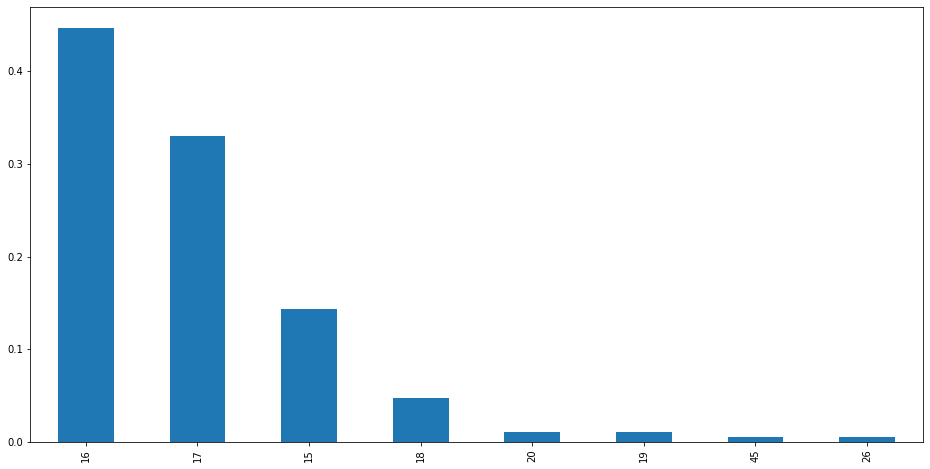

In [25]:
df_trein_yes["NU_IDADE"].value_counts(normalize = True).plot.bar(figsize=(16,8))

In [27]:
df_trein_yes["TP_ST_CONCLUSAO"].value_counts(normalize = True)

3    1.0
Name: TP_ST_CONCLUSAO, dtype: float64

In [28]:
df_comp = df_trein.query("IN_TREINEIRO == 0")
df_comp["TP_ST_CONCLUSAO"].value_counts(normalize = True)

1    0.570648
2    0.423888
4    0.005464
Name: TP_ST_CONCLUSAO, dtype: float64